## Training Corpus Export

Select documents from large imported set and merge with an annotated document collection

In [1]:
import os
import tqdm
import os.path as osp
import pandas as pd
%run env.py
%run src/integration.py

#article_data_file = osp.join(IMPORT_DATA_DIR_01, 'data.csv')
#corpus_dir = osp.join(DATA_DIR, 'articles', 'corpus', 'corpus_00', 'docs')
#doc_limit = 500

article_data_file = osp.join(IMPORT_DATA_DIR_02, 'data.csv')
corpus_dir = osp.join(DATA_DIR, 'articles', 'corpus', 'corpus_01', 'docs')
doc_limit = 10000

In [2]:
df = pd.read_csv(article_data_file)
df = df[df['abstract'].notnull() & df['title'].notnull() & df['date'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12988 entries, 0 to 20449
Data columns (total 6 columns):
abstract    12988 non-null object
date        12988 non-null object
has_text    12988 non-null bool
id          12988 non-null int64
title       12988 non-null object
xml         12988 non-null object
dtypes: bool(1), int64(1), object(4)
memory usage: 621.5+ KB


In [3]:
if doc_limit is not None and doc_limit < len(df):
    print('Sampling from {} records to {}'.format(len(df), doc_limit))
    df = df.sample(n=doc_limit, random_state=1)
df.info()

Sampling from 12988 records to 10000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3013 to 3615
Data columns (total 6 columns):
abstract    10000 non-null object
date        10000 non-null object
has_text    10000 non-null bool
id          10000 non-null int64
title       10000 non-null object
xml         10000 non-null object
dtypes: bool(1), int64(1), object(4)
memory usage: 478.5+ KB


In [4]:
df['has_text'].value_counts()

True     7028
False    2972
Name: has_text, dtype: int64

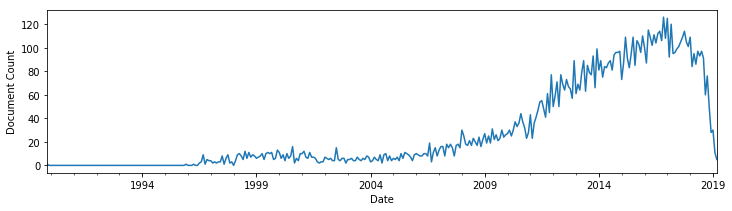

In [7]:
%matplotlib inline
dates = pd.to_datetime(df['date'])
ax = pd.Series(index=dates).groupby(pd.Grouper(freq='M')).size().sort_index().plot(figsize=(12,3))
ax.set_xlabel('Date')
ax.set_ylabel('Document Count')
None

In [5]:
text = []
for i, r in tqdm.tqdm(df.iterrows(), total=len(df)):
    body = extract_text(r['xml'])
    text.append(combine_text(r['title'], r['abstract'], body))
df['text'] = text

100%|██████████| 10000/10000 [09:07<00:00, 18.28it/s]


In [6]:
# Export un-annotated documents
if not osp.exists(corpus_dir):
    os.makedirs(corpus_dir)

for i, r in tqdm.tqdm(df.iterrows()):
    path = osp.join(corpus_dir, 'PMC{}.txt'.format(r['id']))
    with open(path, 'w') as fd:
        fd.write(r['text'])
corpus_dir

10000it [00:04, 2348.05it/s]


'/Users/eczech/data/research/hammer/nlp/20190311-pubmed-tcell-relation/articles/corpus/corpus_01/docs'